### Étape 1 : Importer les bibliothèques et charger les données

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Étape 2 : Exploration de base des données

In [76]:
df = pd.read_csv("ptét_cnp_analyse.csv", parse_dates=["Date"], date_format="%Y-%m-%d")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15371 entries, 0 to 15370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        15371 non-null  datetime64[ns]
 1   Région      15371 non-null  object        
 2   Profession  15371 non-null  object        
 3   PTÉT        15371 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 480.5+ KB


In [78]:
# extrait pour analyse de variation YoY
df["Année"] = df["Date"].dt.year
df["Trimestre"] = df['Date'].dt.quarter

### Étape 3 : Définir les régions et la formule

In [238]:
# Régions d'intérêt
régions = ["Québec", "Ontario", "Colombie-Britannique", "Alberta"]

# Return top 10 professions par région
def top_professions_région(région):
    top_10_prof = (df[(df["Région"] == région) & (df["Profession"] != "Toutes les professions")]
                .groupby("Profession")["PTÉT"]
                .sum()
                .nlargest(10))
    return top_10_prof

In [136]:
df["Région"] = df["Région"].str.strip()
df["Région"].unique()

array(['Terre-Neuve-et-Labrador', 'Île-du-Prince-Édouard',
       'Nouvelle-Écosse', 'Nouveau-Brunswick', 'Québec', 'Ontario',
       'Manitoba', 'Saskatchewan', 'Alberta', 'Colombie-Britannique',
       'Yukon', 'Territoires du Nord-Ouest',
       'Province / territoire non déclaré(e)', 'Canada', 'Nunavut'],
      dtype=object)

In [138]:
top_professions_région("Québec")

Profession
8431 - Ouvriers/ouvrières agricoles                                                                                                                                              109435
8611 - Manoeuvres à la récolte                                                                                                                                                    23875
8432 - Ouvriers/ouvrières de pépinières et de serres                                                                                                                              15830
9617 - Manoeuvres dans la transformation des aliments, des boissons et des produits connexes                                                                                      10380
8252 - Entrepreneurs/entrepreneuses de services agricoles, surveillants/surveillantes d'exploitations agricoles et ouvriers spécialisés/ouvrières spécialisées dans l'élevage      7505
7237 - Soudeurs/soudeuses et opérateurs/opératrices de machines à sou

### Étape 4 : Visualiser les 10 principales professions pour les PTÉT par région

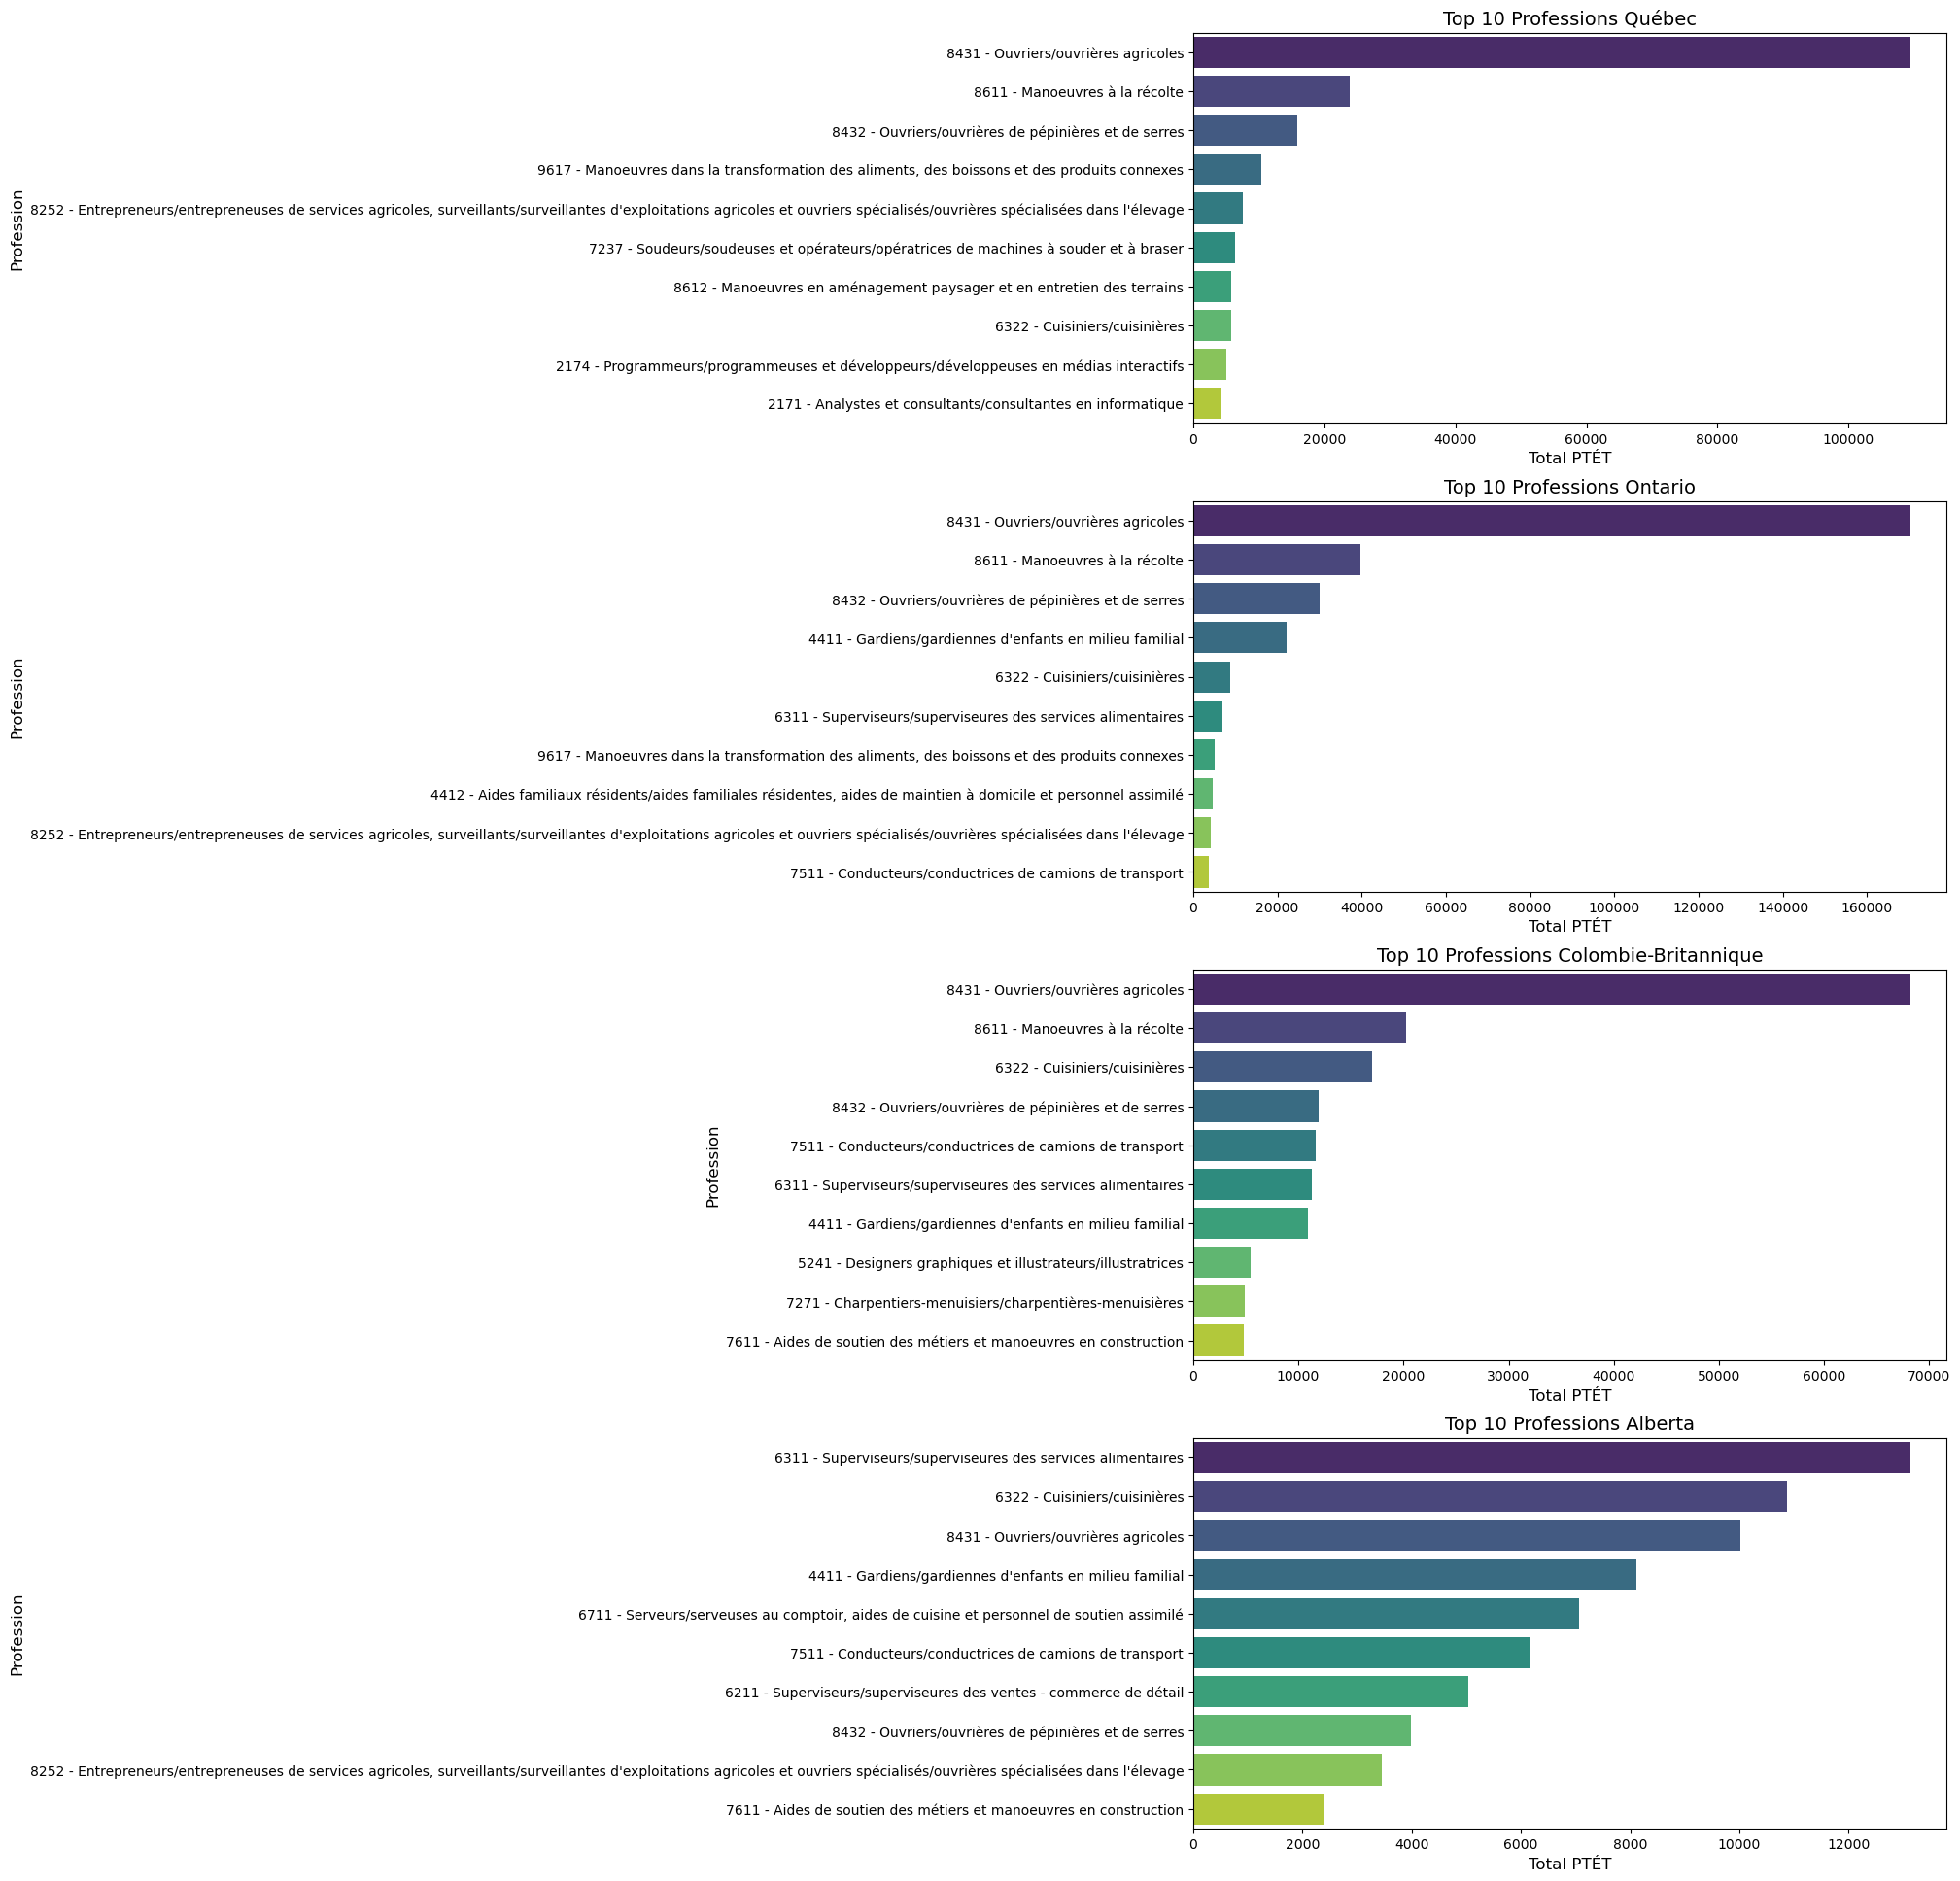

In [267]:
# Plot top 10 professions pour chaque région
fig, axes = plt.subplots(len(régions), 1, figsize=(10, 6 * len(régions)))  # One column, multiple rows
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, région in enumerate(régions):
    top_10_prof = top_professions_région(région)
    sns.barplot(x=top_10_prof.values, y=top_10_prof.index, ax=axes[i], palette="viridis", hue=top_10_prof.index, legend=False)
    axes[i].set_title(f"Top 10 Professions {région}", fontsize=14)
    axes[i].set_xlabel("Total PTÉT", fontsize=12)
    axes[i].set_ylabel("Profession", fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

plt.show()

### Étape 5 : Analyse de la variation annuelle des PTÉT par profession par province (2015 - 2024)

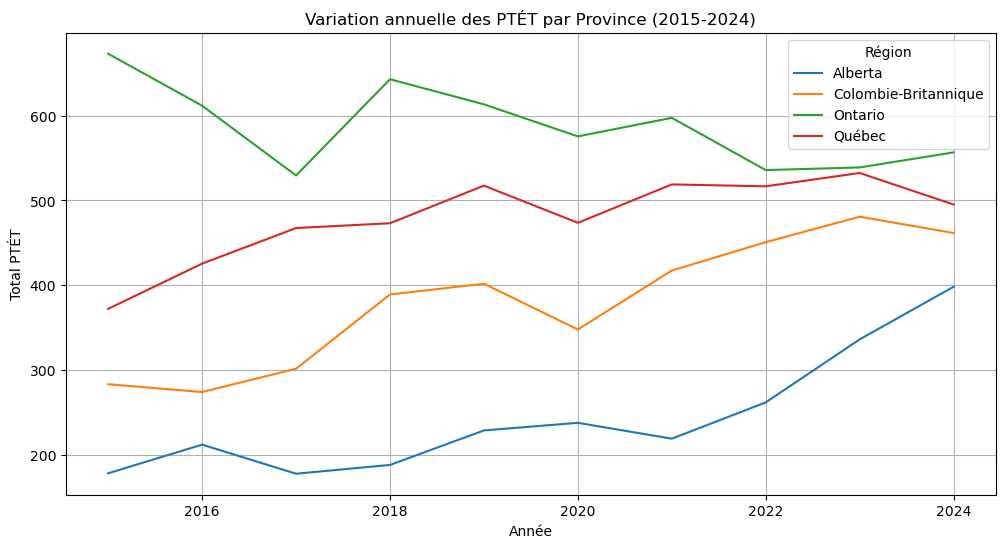

In [269]:
# Filter data pour les régions et grouper par année, région, et profession
yoy_variation = df[df["Région"].isin(régions)].groupby(["Année", "Région", "Profession"])["PTÉT"].sum().reset_index()

# Plot YoY variation for each region
plt.figure(figsize=(12, 6))
sns.lineplot(data=yoy_variation, x="Année", y="PTÉT", hue="Région", errorbar=None)
plt.title("Variation annuelle des PTÉT par Province (2015-2024)")
plt.xlabel("Année")
plt.ylabel("Total PTÉT")
plt.legend(title="Région")
plt.grid()
plt.show()

### Étape 5 : Analyse de la variation trimestrielle des PTÉT par profession par province (2015 - 2024)

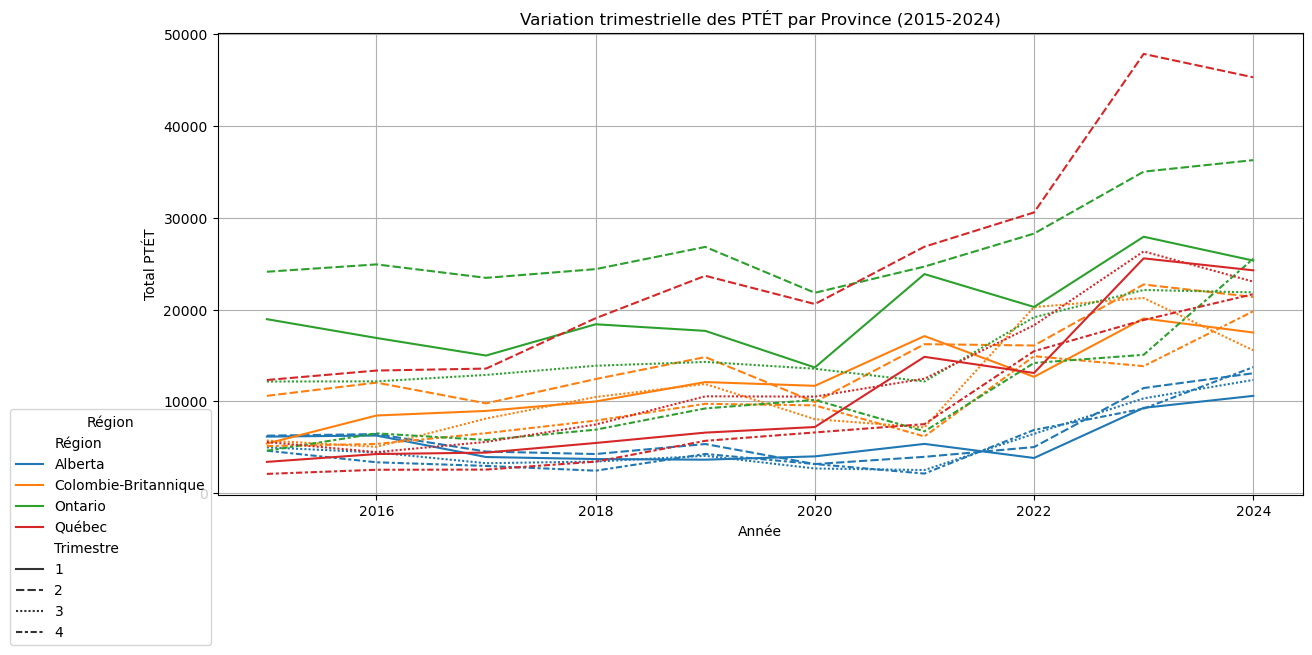

In [271]:
# Group par année, trim, et région pour analyse trimestirelle
quarterly_variation = df[df["Région"].isin(régions)].groupby(["Année", "Trimestre", "Région"])["PTÉT"].sum().reset_index()

# Plot variation trim pour chaque région
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly_variation, x="Année", y="PTÉT", hue="Région", style="Trimestre", errorbar=None)
plt.title("Variation trimestrielle des PTÉT par Province (2015-2024)")
plt.xlabel("Année")
plt.ylabel("Total PTÉT")
plt.legend(title="Région", bbox_to_anchor=(0, 0.2))
plt.grid()
plt.show()

### Analyse des professions du tourisme pour le Québec

### Étape 1 : Définir et Filtrer les données pour les professions touristiques

In [252]:
# Définir la liste des professions du tourisme
professions_tourisme = [
    "0631 - Directeurs/directrices de la restauration et des services alimentaires",
    "6321 - Chefs",
    "6322 - Cuisiniers/cuisinières",
    "6332 - Boulangers-pâtissiers/boulangères-pâtissières",
    "6513 - Serveurs/serveuses d'aliments et de boissons",
    "6722 - Opérateurs/opératrices et préposés/préposées aux sports, aux loisirs et dans les parcs d'attractions",
    "6731 - Préposés/préposées à l'entretien ménager et au nettoyage - travaux légers",
    "6733 - Concierges et surintendants/surintendantes d'immeubles"
]

# Filter le dataframe pour Québec et les professions touristiques
tourisme_québec_df = df[(df["Région"] == "Québec") & (df["Profession"].isin(professions_tourisme))]

tourisme_québec_df.head()

,Date,Région,Profession,PTÉT,Année,Trimestre
61,2015-01-01,Québec,6321 - Chefs,10,2015,1
62,2015-01-01,Québec,6322 - Cuisiniers/cuisinières,20,2015,1
63,2015-01-01,Québec,6332 - Boulangers-pâtissiers/boulangères-pâtis...,10,2015,1
339,2015-04-01,Québec,6321 - Chefs,15,2015,2
340,2015-04-01,Québec,6322 - Cuisiniers/cuisinières,20,2015,2


#### Étape 2 : Classer les principales professions touristiques occupées par PTÉT

In [255]:
# Group par profession et sum PTÉT
top_professions_tourisme = (tourisme_québec_df.groupby("Profession")["PTÉT"]
                           .sum()
                           .sort_values(ascending=False))

top_professions_tourisme

Profession
6322 - Cuisiniers/cuisinières                                                                                  5785
6731 - Préposés/préposées à l'entretien ménager et au nettoyage - travaux légers                               1815
6332 - Boulangers-pâtissiers/boulangères-pâtissières                                                            880
6321 - Chefs                                                                                                    800
0631 - Directeurs/directrices de la restauration et des services alimentaires                                   455
6513 - Serveurs/serveuses d'aliments et de boissons                                                             355
6733 - Concierges et surintendants/surintendantes d'immeubles                                                   255
6722 - Opérateurs/opératrices et préposés/préposées aux sports, aux loisirs et dans les parcs d'attractions     130
Name: PTÉT, dtype: int64

#### Étape 3 : Visualiser les principales professions touristiques

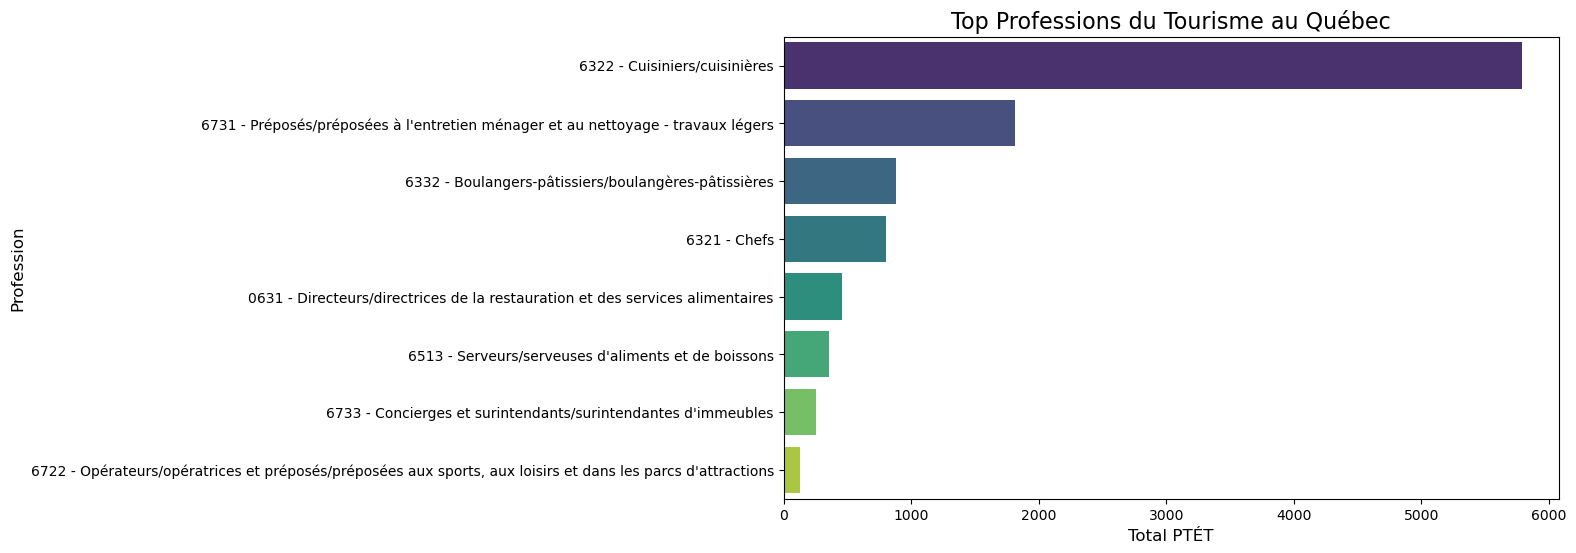

In [257]:
# Plot le top professions du tourisme au Québec
plt.figure(figsize=(10, 6))
sns.barplot(x=top_professions_tourisme.values, y=top_professions_tourisme.index, palette="viridis", hue=top_professions_tourisme.index, legend=False)
plt.title("Top Professions du Tourisme au Québec", fontsize=16)
plt.xlabel("Total PTÉT", fontsize=12)
plt.ylabel("Profession", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

#### Étape 4 : Variation annuelle pour les professions touristiques

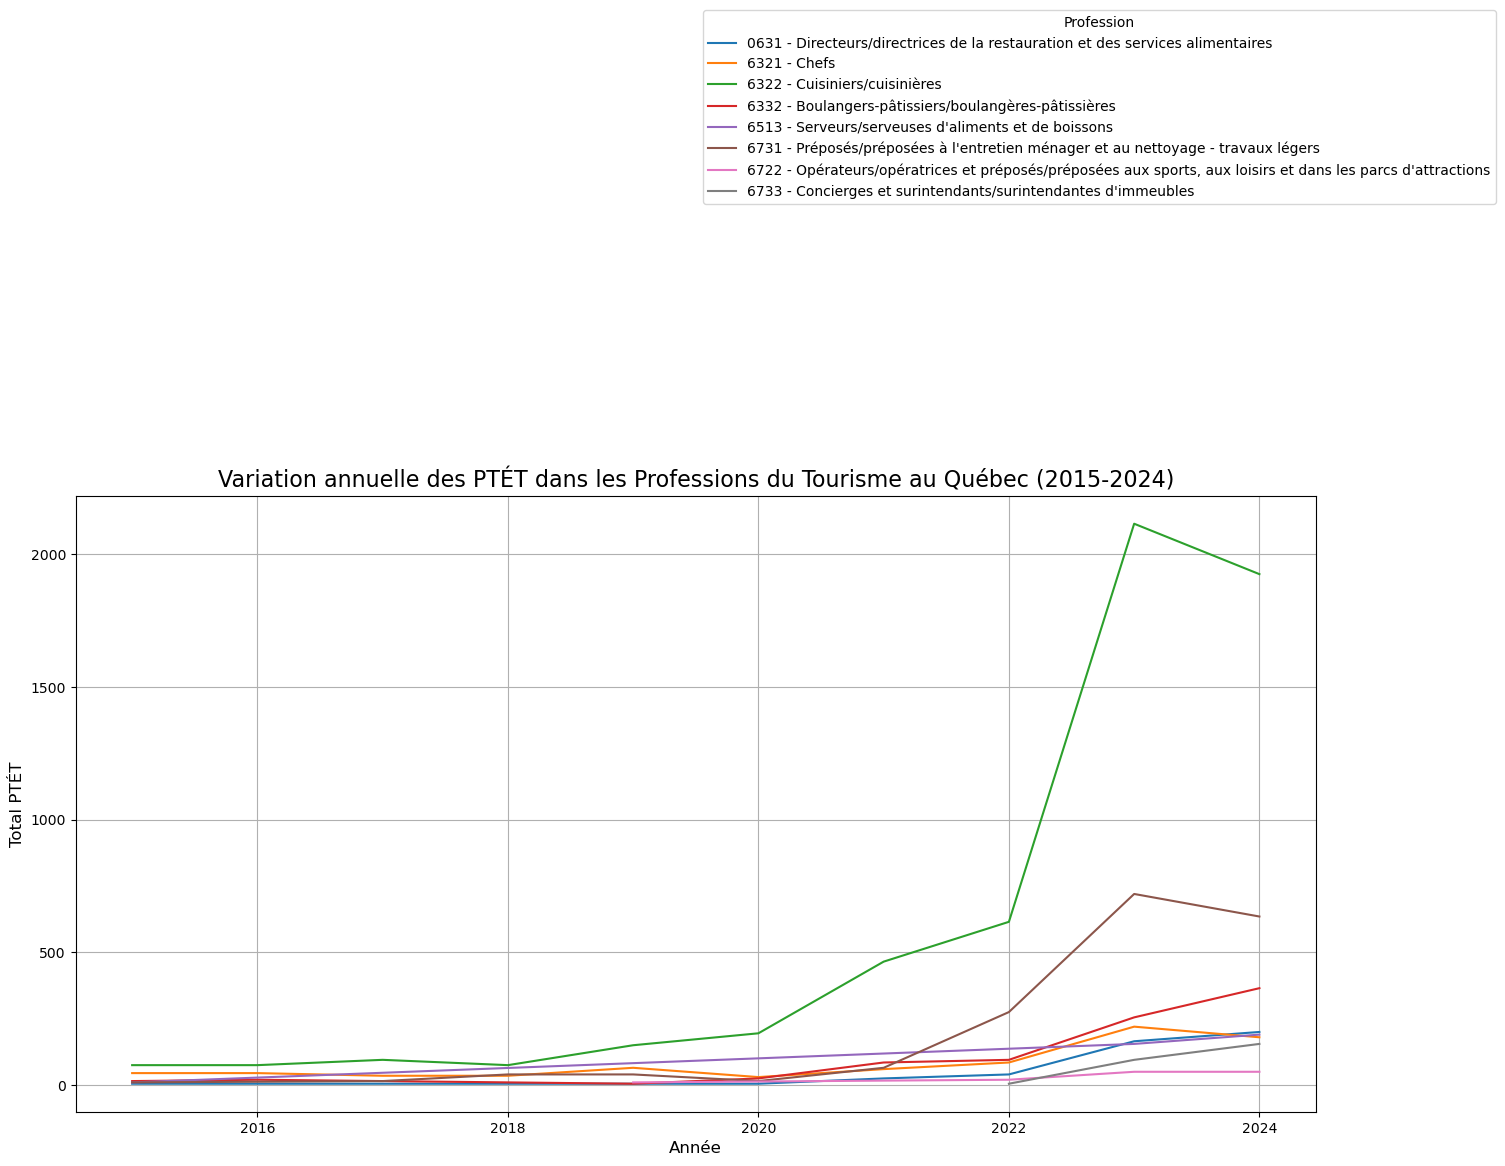

In [259]:
# Group par Année et Profession pour computer la yoy variation
yoy_tourisme = tourisme_québec_df.groupby(["Année", "Profession"])["PTÉT"].sum().reset_index()

# Plot yoy variation pour les professions du tourisme
plt.figure(figsize=(16, 8))
sns.lineplot(data=yoy_tourisme, x="Année", y="PTÉT", hue="Profession", errorbar=None)
plt.title("Variation annuelle des PTÉT dans les Professions du Tourisme au Québec (2015-2024)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Total PTÉT", fontsize=12)
plt.legend(title="Profession", bbox_to_anchor=(0.5, 1.8), loc='upper left')  # Move legend outside the plot
plt.grid()
plt.show()

#### Étape 5 : Variation trimestrielle pour les professions touristiques

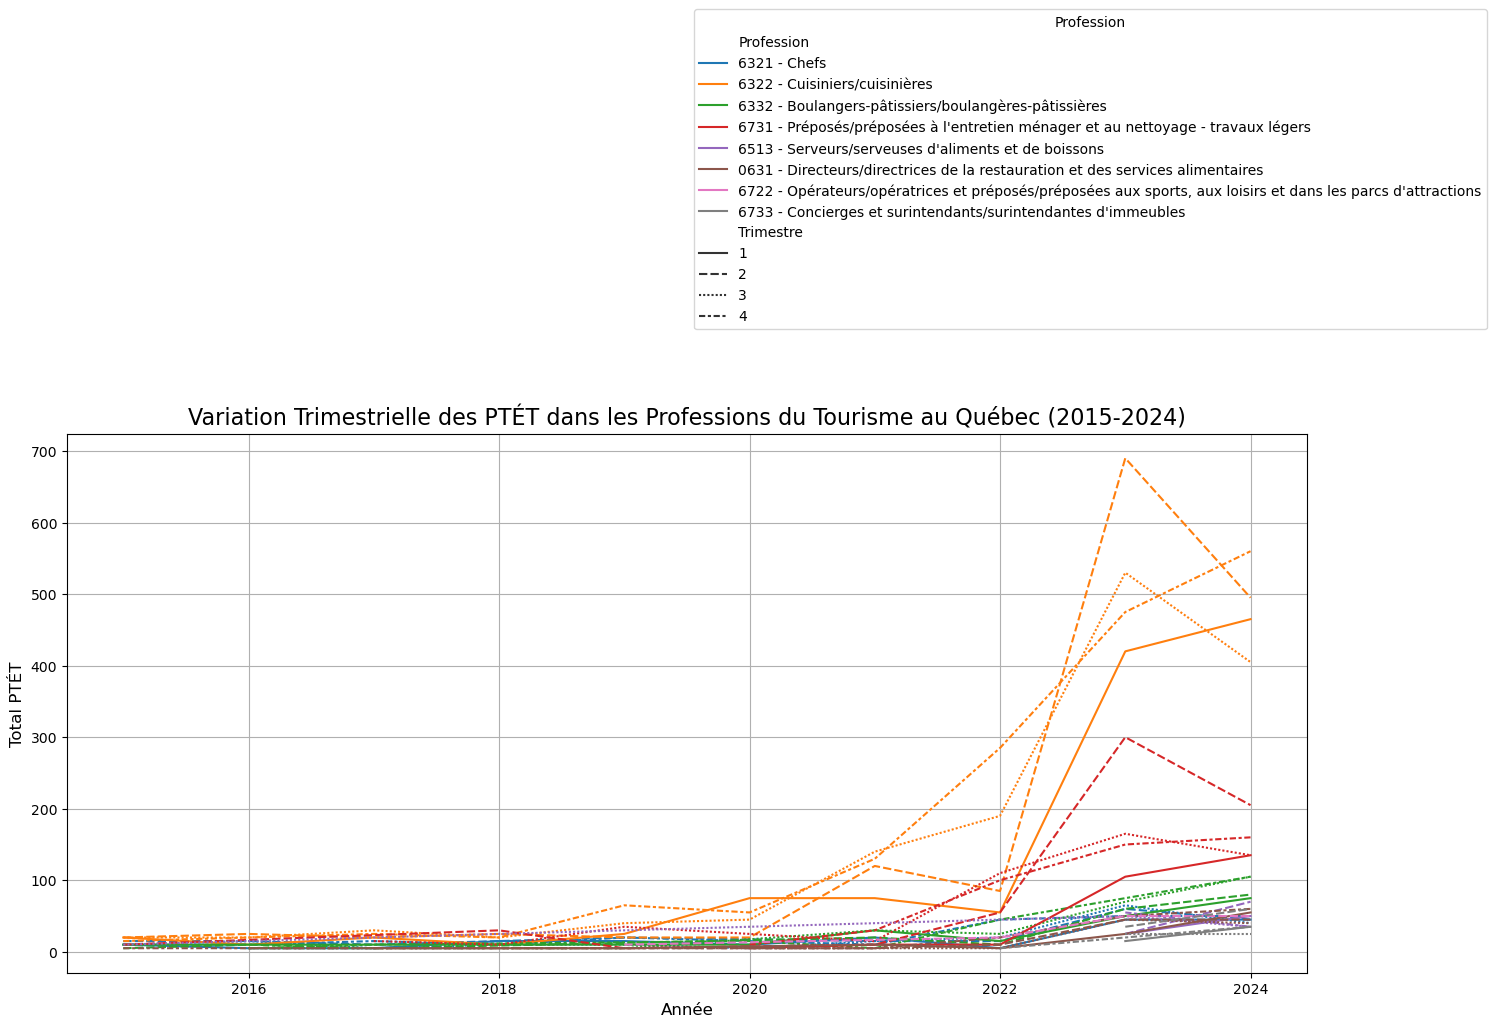

In [264]:
# Group par Année, Trim, et Profession pour l'analyse trimestrielle
tourisme_trimestriel = tourisme_québec_df.groupby(["Année", "Trimestre", "Profession"])["PTÉT"].sum().reset_index()

# Plot variation trimestrielle pour professions du tourisme
plt.figure(figsize=(16, 7))
sns.lineplot(data=tourisme_trimestriel, x="Année", y="PTÉT", hue="Profession", style="Trimestre", errorbar=None)
plt.title("Variation Trimestrielle des PTÉT dans les Professions du Tourisme au Québec (2015-2024)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Total PTÉT", fontsize=12)
plt.legend(title="Profession", bbox_to_anchor=(0.5, 1.8), loc='upper left')  # Move legend outside the plot
plt.grid()
plt.show()